In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, norm

In [132]:
diabetes = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h1 style="
  text-align: center; 
  color: #7026d7ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  Data Cleaning and Exploring Data
</h1>

In [133]:
diabetes.shape

(253680, 22)

In [134]:
diabetes.columns.tolist()

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

<h1 style="
  text-align: center; 
  color: #D7263D; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Diabetes_012 col
</h1>

In [135]:
diabetes_012 = diabetes["Diabetes_012"]
diabetes_012.describe()

count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes_012, dtype: float64

In [136]:
diabetes_012.unique()

array([0., 2., 1.])

In [137]:
diabetes_012.isnull().sum()

np.int64(0)

In [138]:
diabetes_012.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    2.0
9    0.0
Name: Diabetes_012, dtype: float64

In [139]:
diabetes_012.value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [140]:
diabetes_012.dtype

dtype('float64')

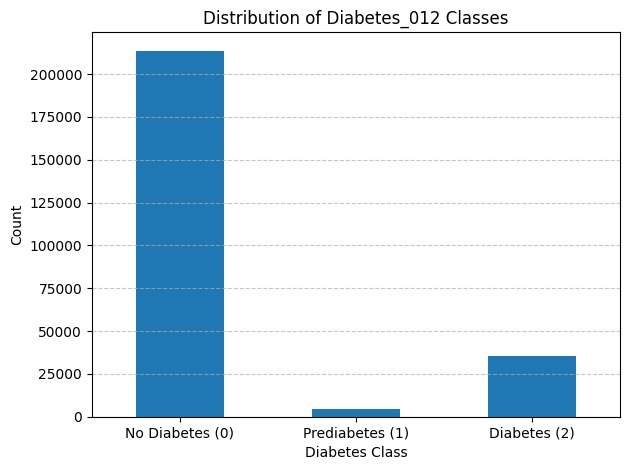

In [141]:
counts = diabetes_012.value_counts().reindex([0, 1, 2], fill_value=0)

counts.plot(kind='bar')
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.title("Distribution of Diabetes_012 Classes")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [142]:
skew(diabetes_012)

np.float64(1.9763787297494344)

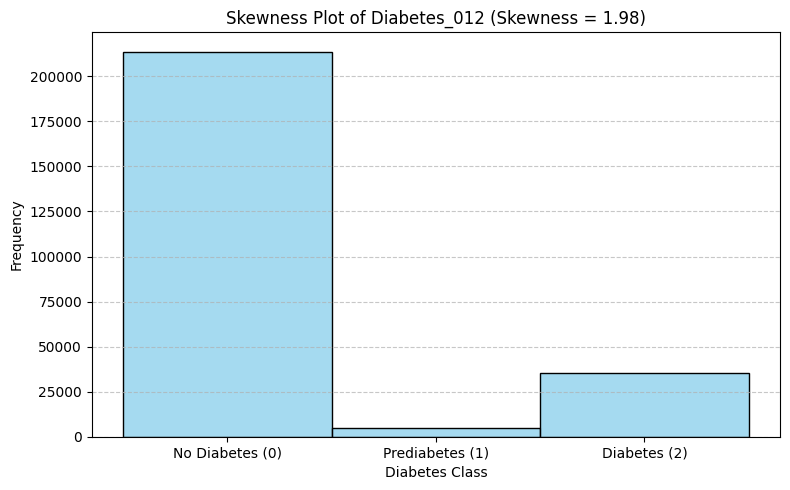

In [143]:
diabetes_012_skew = skew(diabetes_012)

plt.figure(figsize=(8, 5))
sns.histplot(diabetes_012, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Diabetes_012 (Skewness = {diabetes_012_skew:.2f})")
plt.xlabel("Diabetes Class")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2], ["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

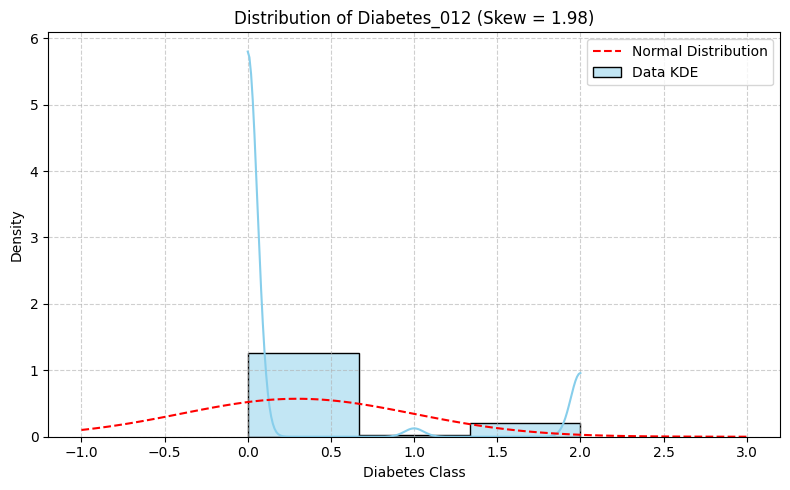

In [144]:
plt.figure(figsize=(8, 5))
sns.histplot(diabetes_012, kde=True, stat="density", bins=3, color="skyblue", edgecolor="black", label="Data KDE")

# Overlay normal distribution with same mean & std
mu, std = diabetes_012.mean(), diabetes_012.std()
xmin, xmax = diabetes_012.min(), diabetes_012.max()
x = np.linspace(xmin - 1, xmax + 1, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', label="Normal Distribution")

plt.title(f"Distribution of Diabetes_012 (Skew = {diabetes_012.skew():.2f})")
plt.xlabel("Diabetes Class")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [145]:
counts = diabetes_012.value_counts().sort_index()
percentages = diabetes_012.value_counts(normalize=True).sort_index() * 100
diabetes_012_df = pd.DataFrame({
    "Count": counts,
    "Percentage": percentages.round(2)
})
print(diabetes_012_df)


               Count  Percentage
Diabetes_012                    
0.0           213703       84.24
1.0             4631        1.83
2.0            35346       13.93


In [146]:
diabetes_012_df

,Count,Percentage
Diabetes_012,,
0.0,213703,84.24
1.0,4631,1.83
2.0,35346,13.93


In [147]:
diabetes_012.dtype

dtype('float64')

In [148]:
if "BMI" in diabetes.columns:
    print(diabetes.groupby("Diabetes_012")["BMI"].mean())


Diabetes_012
0.0    27.742521
1.0    30.724466
2.0    31.944011
Name: BMI, dtype: float64


In [149]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #1a9110ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HighBP col
</h1>

In [150]:
highBp = diabetes["HighBP"]
highBp.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: HighBP, dtype: float64

In [151]:
highBp.value_counts()

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

In [152]:
highBp.describe()

count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64

In [153]:
highBp.isnull().sum()

np.int64(0)

In [154]:
highBp.unique()

array([1., 0.])

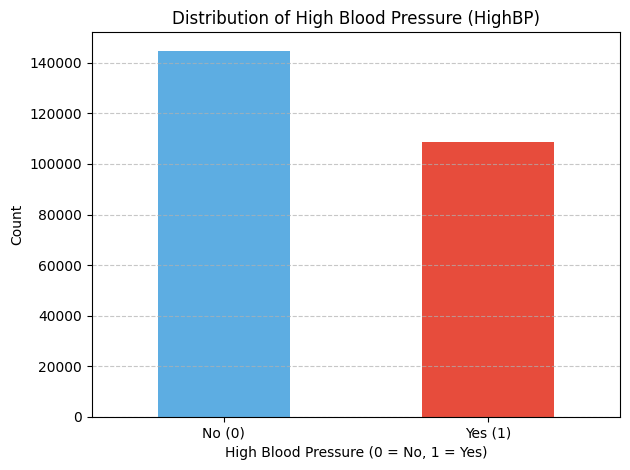

In [155]:
counts = highBp.value_counts().sort_index()
counts.plot(kind='bar', color=["#5DADE2", "#E74C3C"])
plt.title("Distribution of High Blood Pressure (HighBP)")
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No (0)", "Yes (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


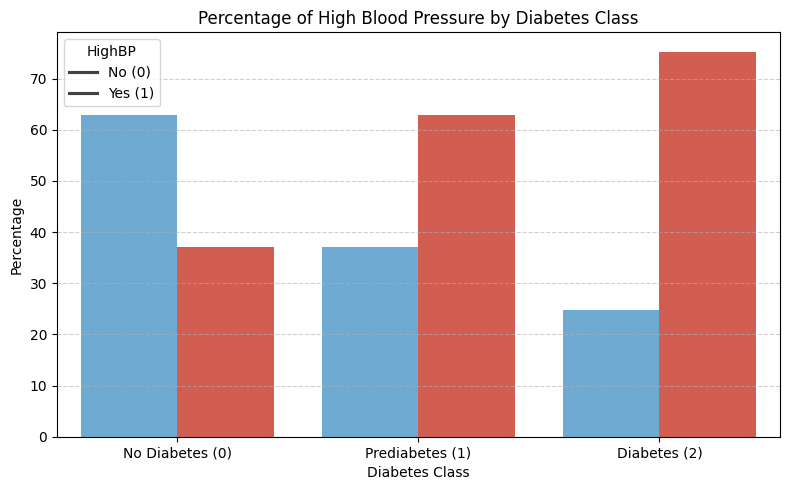

In [157]:
percent_df = pd.crosstab(diabetes_012, diabetes["HighBP"], normalize='index') * 100
percent_df = percent_df.reset_index().melt(id_vars="Diabetes_012", var_name="HighBP", value_name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(data=percent_df, x="Diabetes_012", y="Percentage", hue="HighBP", palette=["#5DADE2", "#E74C3C"])

plt.title("Percentage of High Blood Pressure by Diabetes Class")
plt.xlabel("Diabetes Class")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.legend(title="HighBP", labels=["No (0)", "Yes (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #266ad7ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HighChol col
</h1>

In [ ]:
HighChol = diabetes["HighChol"]
diabetes["HighChol"].describe()

count    253680.000000
mean          0.424121
std           0.494210
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64

In [ ]:
HighChol.isnull().sum()

np.int64(0)

In [ ]:
HighChol.value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

In [ ]:
HighChol.unique()

array([1., 0.])

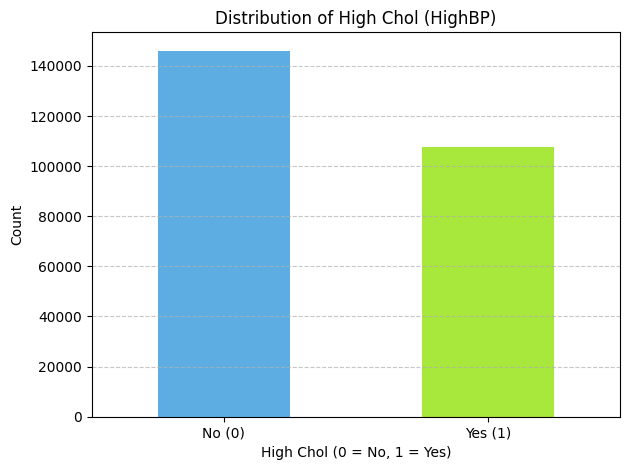

In [ ]:
counts = HighChol.value_counts().sort_index()
counts.plot(kind='bar', color=["#5DADE2", "#A8E73C"])
plt.title("Distribution of High Chol (HighBP)")
plt.xlabel("High Chol (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No (0)", "Yes (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

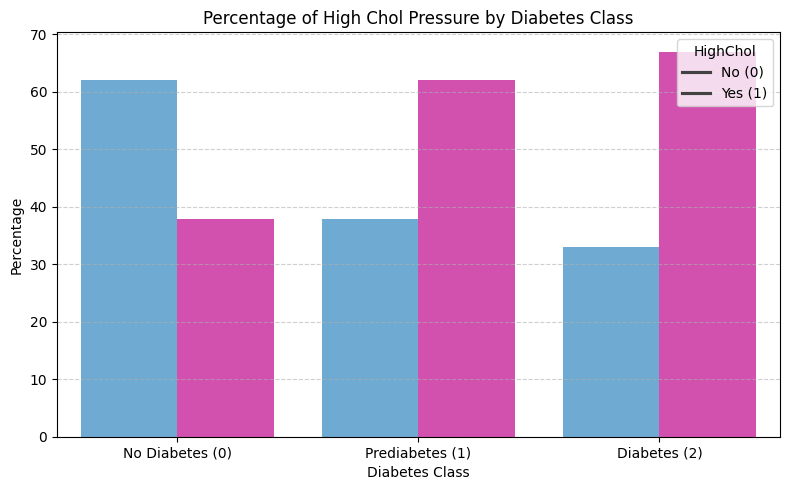

In [ ]:
percent_df = pd.crosstab(diabetes_012, HighChol, normalize='index') * 100
percent_df = percent_df.reset_index().melt(id_vars="Diabetes_012", var_name="HighChol", value_name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(data=percent_df, x="Diabetes_012", y="Percentage", hue="HighChol", palette=["#5DADE2", "#E73CB9"])

plt.title("Percentage of High Chol Pressure by Diabetes Class")
plt.xlabel("Diabetes Class")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.legend(title="HighChol", labels=["No (0)", "Yes (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
skew(HighChol)

np.float64(0.3070728628831409)

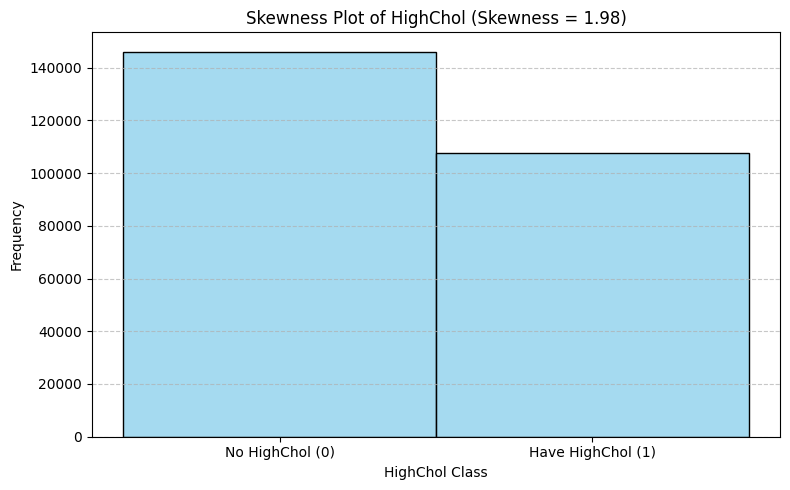

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(HighChol, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of HighChol (Skewness = {skew(HighChol):.2f})")
plt.xlabel("HighChol Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["No HighChol (0)", "Have HighChol (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

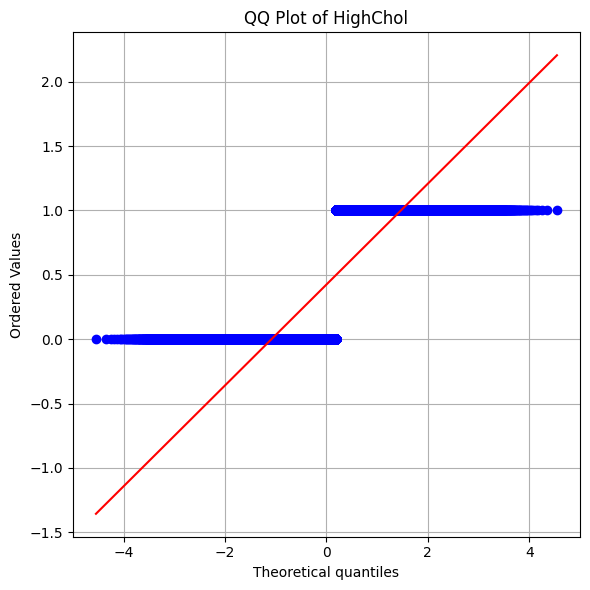

In [ ]:
plt.figure(figsize=(6, 6))
stats.probplot(HighChol, dist="norm", plot=plt)
plt.title("QQ Plot of HighChol")
plt.grid(True)
plt.tight_layout()
plt.show()

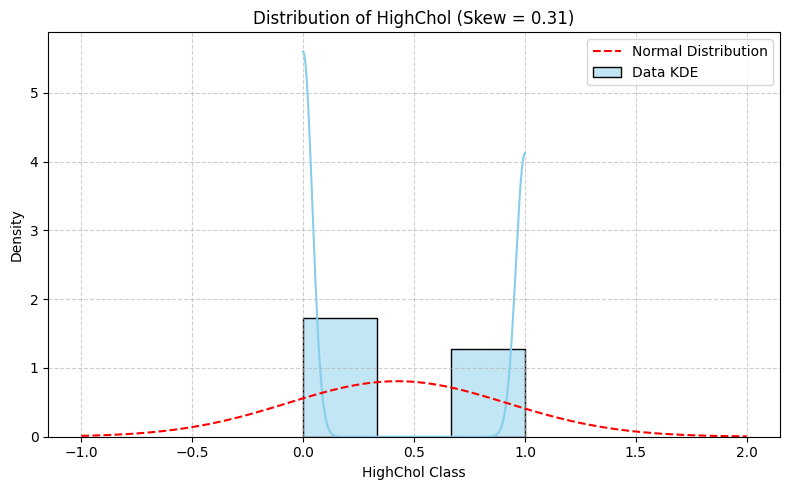

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(HighChol, kde=True, stat="density", bins=3, color="skyblue", edgecolor="black", label="Data KDE")

# Overlay normal distribution with same mean & std
mu, std = HighChol.mean(), HighChol.std()
xmin, xmax = HighChol.min(), HighChol.max()
x = np.linspace(xmin - 1, xmax + 1, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', label="Normal Distribution")

plt.title(f"Distribution of HighChol (Skew = {HighChol.skew():.2f})")
plt.xlabel("HighChol Class")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h1 style="
  text-align: center; 
  color: #a5d726ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for CholCheck col
</h1>

In [ ]:
CholCheck = diabetes["CholCheck"]
diabetes["CholCheck"].describe()

count    253680.000000
mean          0.962670
std           0.189571
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64

In [ ]:
CholCheck.unique()

array([1., 0.])

In [ ]:
CholCheck.isnull().sum()

np.int64(0)

In [ ]:
CholCheck.value_counts()

CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64

In [ ]:
CholCheck.dtype

dtype('float64')

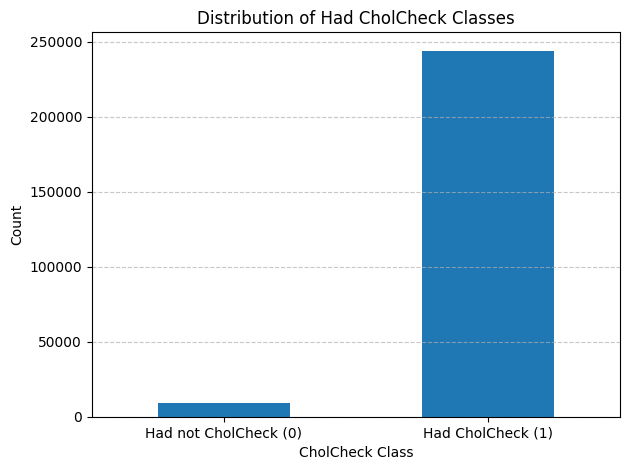

In [ ]:
CholCheck_counts = CholCheck.value_counts().reindex([0, 1], fill_value=0)

CholCheck_counts.plot(kind='bar')
plt.xlabel("CholCheck Class")
plt.ylabel("Count")
plt.title("Distribution of Had CholCheck Classes")
plt.xticks(ticks=[0, 1], labels=["Had not CholCheck (0)", "Had CholCheck (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

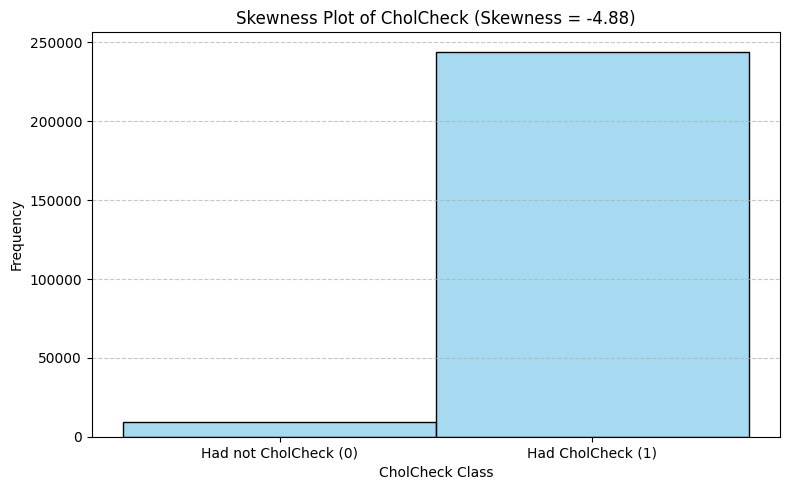

In [ ]:
CholCheck_skew = skew(CholCheck)

plt.figure(figsize=(8, 5))
sns.histplot(CholCheck, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of CholCheck (Skewness = {CholCheck_skew:.2f})")
plt.xlabel("CholCheck Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Had not CholCheck (0)", "Had CholCheck (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\2113431120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=CholCheck, palette="pastel", edgecolor="black")


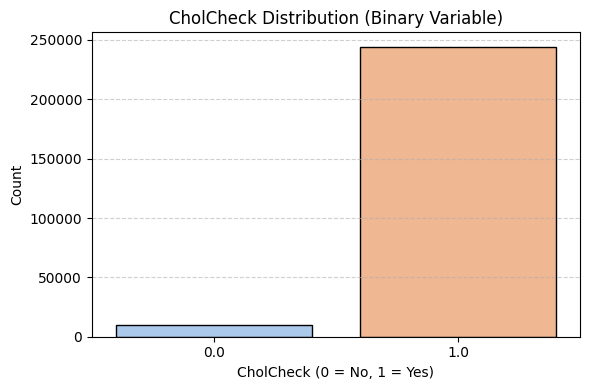

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=CholCheck, palette="pastel", edgecolor="black")

plt.title("CholCheck Distribution (Binary Variable)")
plt.xlabel("CholCheck (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
CholCheck_counts = CholCheck.value_counts().sort_index()
percentages = CholCheck.value_counts(normalize=True).sort_index() * 100
CholCheck_df = pd.DataFrame({
    "Count": CholCheck_counts,
    "Percentage": percentages.round(2)
})
print(CholCheck_df)

            Count  Percentage
CholCheck                    
0.0          9470        3.73
1.0        244210       96.27


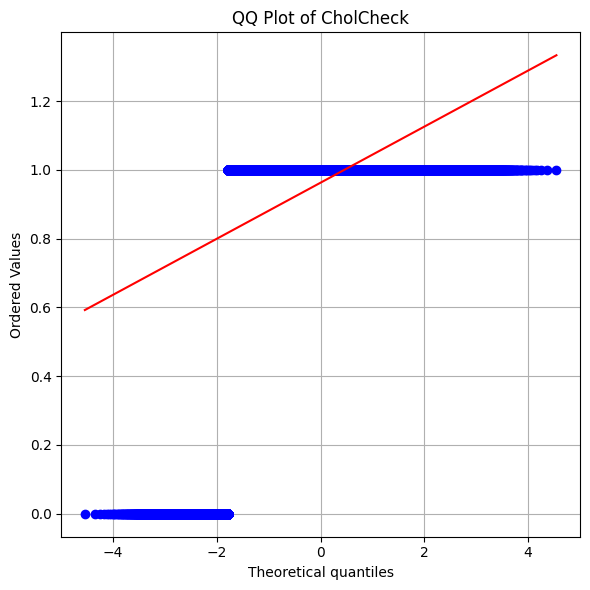

In [ ]:
plt.figure(figsize=(6, 6))
stats.probplot(CholCheck, dist="norm", plot=plt)
plt.title("QQ Plot of CholCheck")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #ffffffff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for BMI col
</h1>

In [ ]:
BMI = diabetes["BMI"]
diabetes["BMI"].dtype

dtype('float64')

In [ ]:
BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [ ]:
BMI.describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [ ]:
BMI.isnull().sum()

np.int64(0)

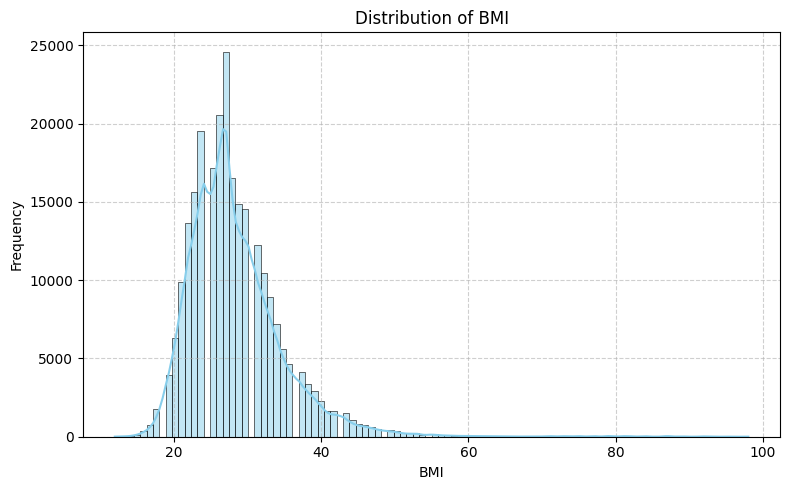

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(BMI, kde=True, color="skyblue", edgecolor="black", bins=100)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

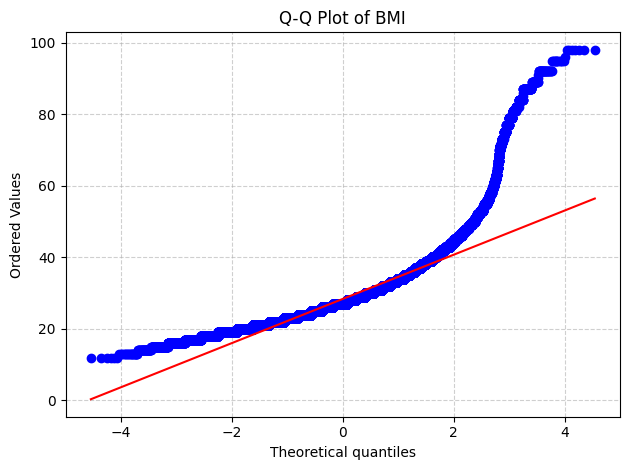

In [ ]:
stats.probplot(BMI, dist="norm", plot=plt)
plt.title("Q-Q Plot of BMI")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
skew(BMI)

np.float64(2.1219912109445866)

In [ ]:
BMI.value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
86.0        1
91.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\3081757263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CholCheck", y="BMI", data=diabetes, palette="Set3")


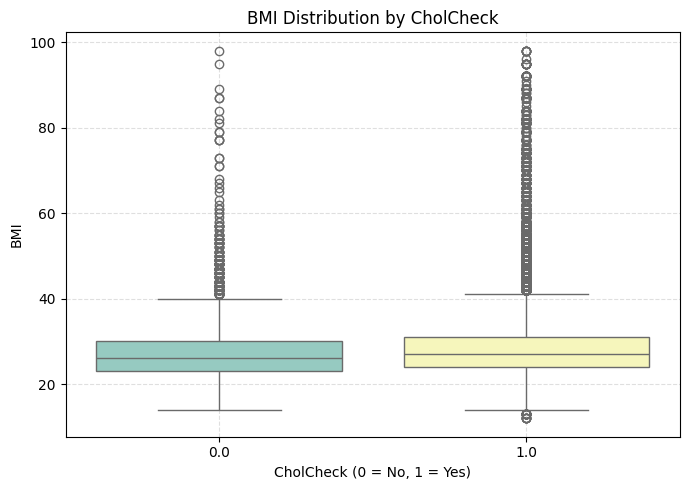

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="CholCheck", y="BMI", data=diabetes, palette="Set3")
plt.title("BMI Distribution by CholCheck")
plt.xlabel("CholCheck (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


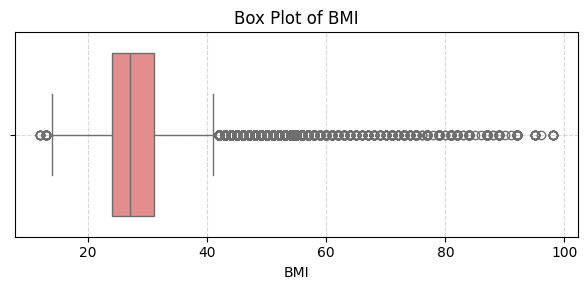

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=BMI, color="lightcoral")
plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


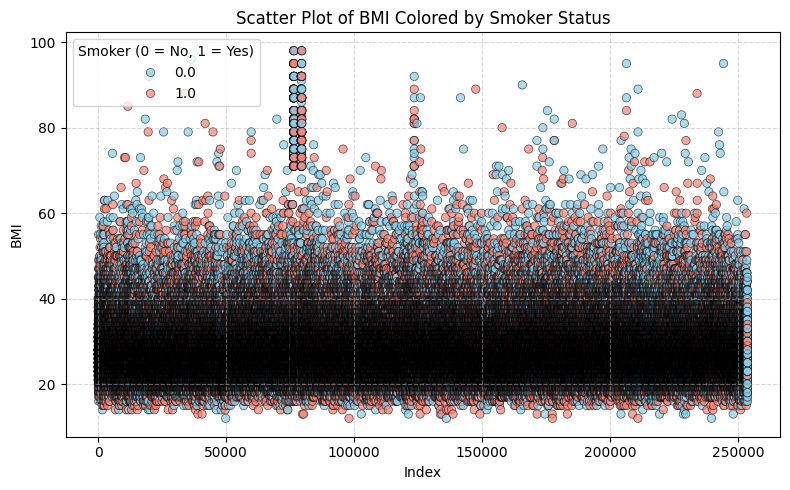

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=range(len(BMI)), 
    y="BMI", 
    hue="Smoker", 
    palette={0: "skyblue", 1: "salmon"}, 
    data=diabetes,
    alpha=0.7,
    edgecolor="black"
)

plt.title("Scatter Plot of BMI Colored by Smoker Status")
plt.xlabel("Index")
plt.ylabel("BMI")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Smoker (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()


In [ ]:
bmi = diabetes["BMI"]
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = bmi[(bmi < lower_threshold) | (bmi > upper_threshold)]
n_outliers = outliers.count()

print(f"Number of outliers: {n_outliers}")

Number of outliers: 9847


<h1 style="
  text-align: center; 
  color: #ffffffff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  Correlation on dataset
</h1>

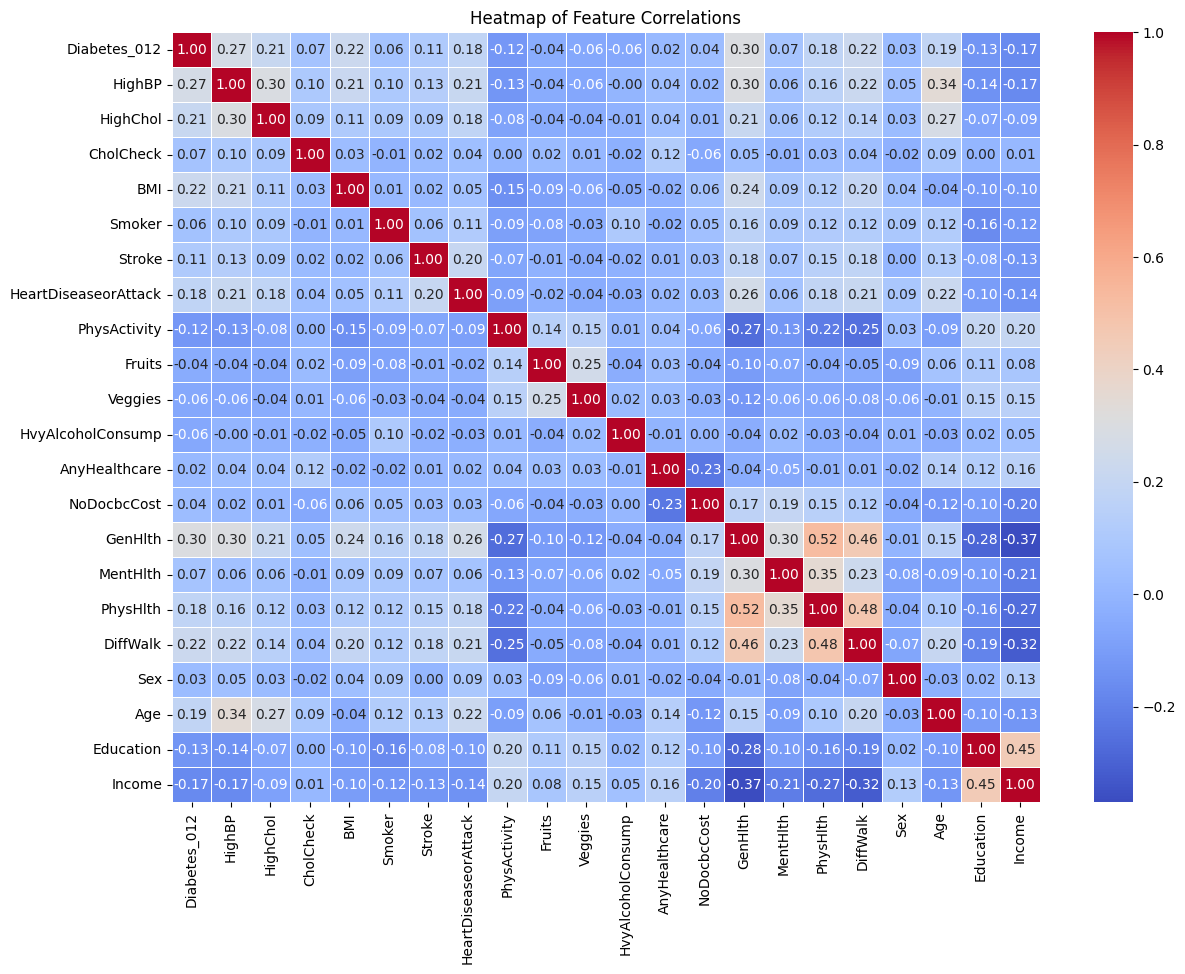

In [ ]:
corr = diabetes.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap of Feature Correlations')
plt.show()

<h1 style="
  text-align: center; 
  color: #c52929ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Smoker col
</h1>

In [ ]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
Smoker = diabetes["Smoker"]
diabetes["Smoker"].describe()

count    253680.000000
mean          0.443169
std           0.496761
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Smoker, dtype: float64

In [ ]:
Smoker.unique()

array([1., 0.])

In [ ]:
Smoker.isnull().sum()

np.int64(0)

In [ ]:
Smoker.dtype

dtype('float64')

In [ ]:
Smoker.value_counts()

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\7347499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=diabetes["Smoker"], palette="pastel", edgecolor="black")


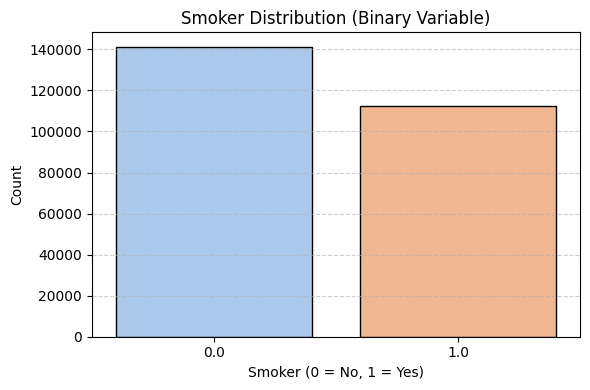

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=Smoker, palette="pastel", edgecolor="black")

plt.title("Smoker Distribution (Binary Variable)")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\3655004402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Diabetes_012", y="Smoker", data=smoker_ratio, palette="viridis")


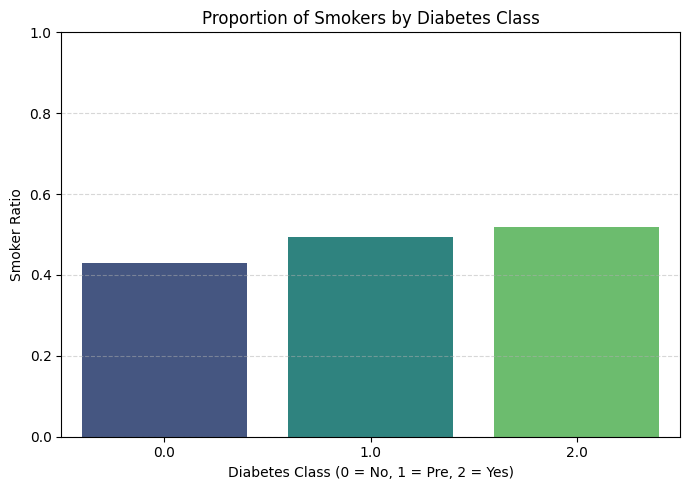

In [ ]:
smoker_ratio = diabetes.groupby("Diabetes_012")["Smoker"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x="Diabetes_012", y="Smoker", data=smoker_ratio, palette="viridis")

plt.title("Proportion of Smokers by Diabetes Class")
plt.xlabel("Diabetes Class (0 = No, 1 = Pre, 2 = Yes)")
plt.ylabel("Smoker Ratio")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #ccee10ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Stroke col
</h1>

In [ ]:
Stroke = diabetes["Stroke"]
diabetes["Stroke"].value_counts()

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

In [ ]:
Stroke.isnull().sum()

np.int64(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9080\3480275458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=diabetes["Stroke"], palette="Blues", edgecolor="black")


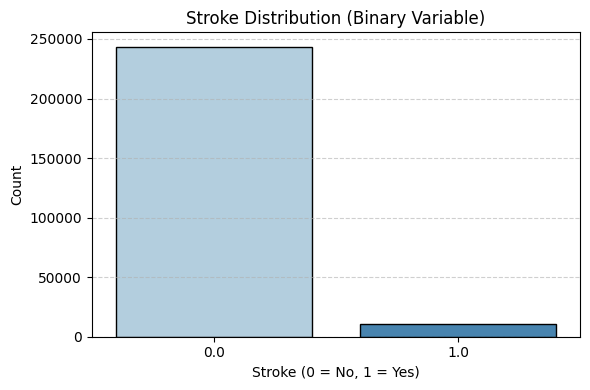

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=Stroke, palette="Blues", edgecolor="black")

plt.title("Stroke Distribution (Binary Variable)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.show()

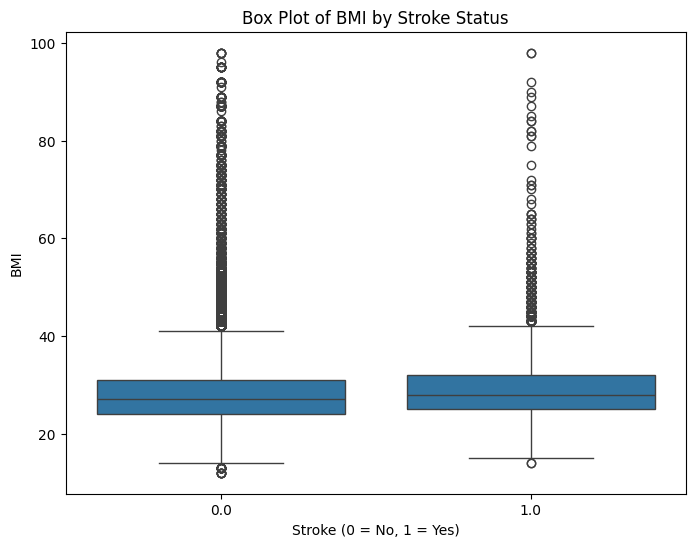

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stroke', y='BMI', data=diabetes)

plt.title('Box Plot of BMI by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

In [ ]:
stroke = diabetes["Stroke"]
Q1 = stroke.quantile(0.25)
Q3 = stroke.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = stroke[(stroke < lower_threshold) | (stroke > upper_threshold)]
n_outliers = outliers.count()

print(f"Number of outliers: {n_outliers}")

Number of outliers: 10292


<h1 style="
  text-align: center; 
  color: #ffb300ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HeartDiseaseorAttack col
</h1>

In [ ]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
HeartDiseaseorAttack = diabetes["HeartDiseaseorAttack"]
diabetes["HeartDiseaseorAttack"].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [ ]:
HeartDiseaseorAttack.dtype

dtype('float64')

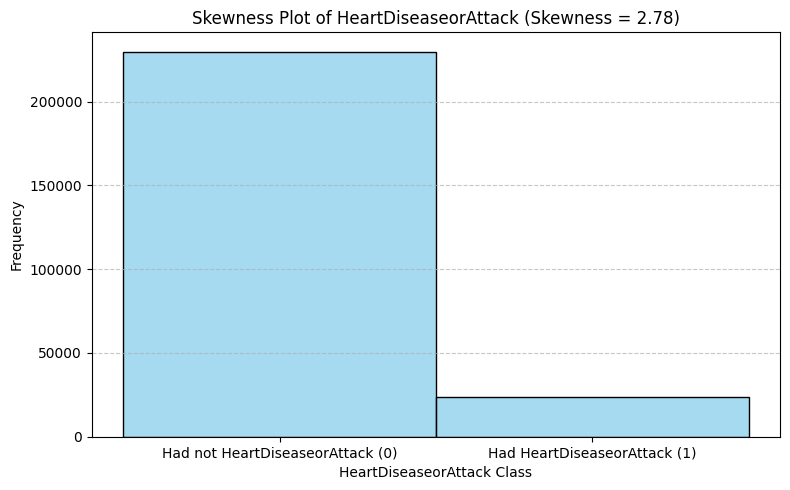

In [ ]:
HeartDiseaseorAttack_skew = skew(diabetes["HeartDiseaseorAttack"])

plt.figure(figsize=(8, 5))
sns.histplot(HeartDiseaseorAttack, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of HeartDiseaseorAttack (Skewness = {HeartDiseaseorAttack_skew:.2f})")
plt.xlabel("HeartDiseaseorAttack Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Had not HeartDiseaseorAttack (0)", "Had HeartDiseaseorAttack (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="
  text-align: center; 
  color: #858585ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for PyisActivity col
</h1>

In [ ]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
PhysActivity = diabetes["PhysActivity"]
PhysActivity.value_counts()

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

In [ ]:
PhysActivity.describe()

count    253680.000000
mean          0.756544
std           0.429169
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PhysActivity, dtype: float64

In [ ]:
PhysActivity.isnull().sum()

np.int64(0)

In [ ]:
PhysActivity.unique()

array([0., 1.])

In [ ]:
PhysActivity.dtype

dtype('float64')

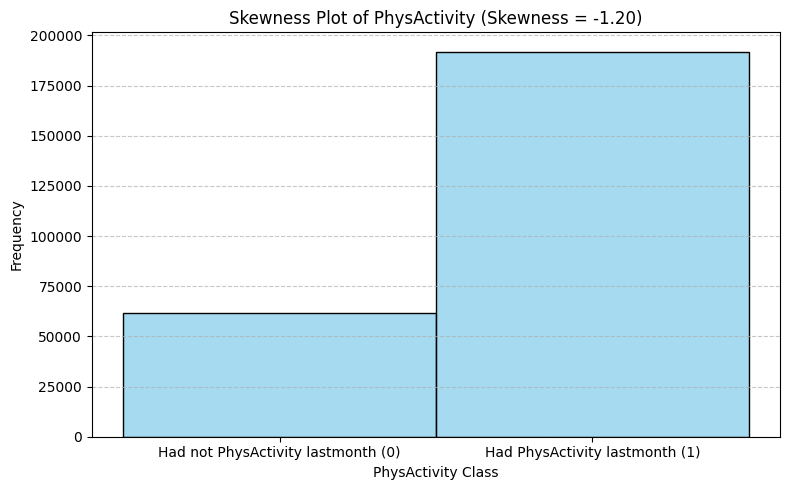

In [ ]:
PhysActivity_skew = skew(PhysActivity)

plt.figure(figsize=(8, 5))
sns.histplot(diabetes["PhysActivity"], kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of PhysActivity (Skewness = {PhysActivity_skew:.2f})")
plt.xlabel("PhysActivity Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Had not PhysActivity lastmonth (0)", "Had PhysActivity lastmonth (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="
  text-align: center; 
  color: #f40d80ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Fruits col
</h1>

In [158]:
Fruits = diabetes["Fruits"]
Fruits.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Fruits, dtype: float64

In [159]:
Fruits.isnull().sum()

np.int64(0)

In [160]:
Fruits.unique()

array([0., 1.])

In [161]:
Fruits.describe()

count    253680.000000
mean          0.634256
std           0.481639
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Fruits, dtype: float64

In [162]:
Fruits.dtype

dtype('float64')

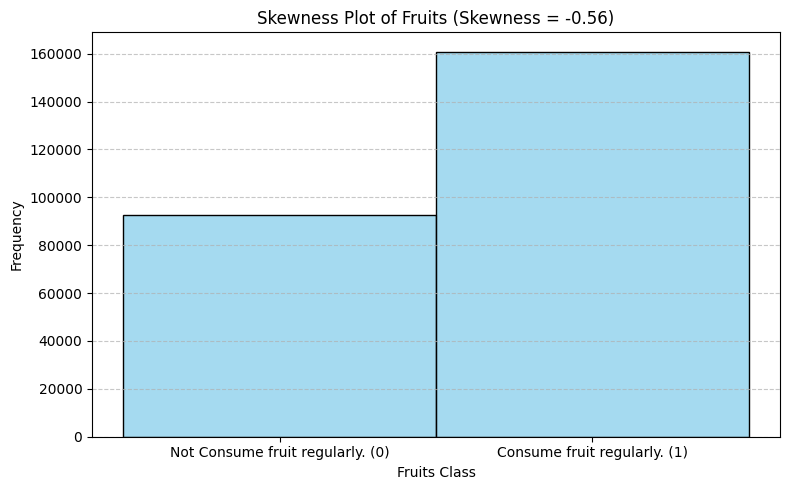

In [164]:
Fruits_skew = skew(Fruits)

plt.figure(figsize=(8, 5))
sns.histplot(Fruits, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Fruits (Skewness = {Fruits_skew:.2f})")
plt.xlabel("Fruits Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Not Consume fruit regularly. (0)", "Consume fruit regularly. (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [165]:
Fruits.value_counts()

Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

In [166]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #6a6e18ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Veggies col
</h1>

In [167]:
Veggies = diabetes["Veggies"]
Veggies.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Veggies, dtype: float64

In [168]:
Veggies.isnull().sum()

np.int64(0)

In [169]:
Veggies.unique()

array([1., 0.])

In [170]:
Veggies.dtype

dtype('float64')

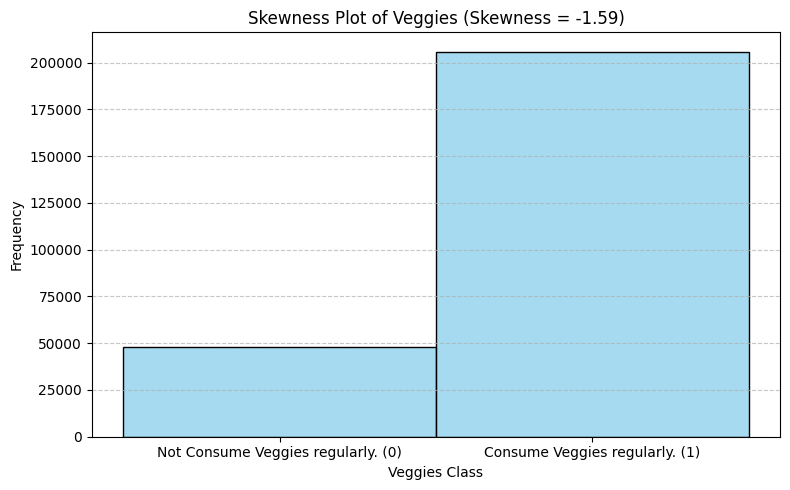

In [171]:
Veggies_skew = skew(Veggies)

plt.figure(figsize=(8, 5))
sns.histplot(Veggies, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Veggies (Skewness = {Veggies_skew:.2f})")
plt.xlabel("Veggies Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Not Consume Veggies regularly. (0)", "Consume Veggies regularly. (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [172]:
Veggies.value_counts()

Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

In [173]:
veggies_counts = Veggies.value_counts().sort_index()
veggies_percentages = Veggies.value_counts(normalize=True).sort_index() * 100
veggies_df = pd.DataFrame({
    "Count": veggies_counts,
    "Percentage": veggies_percentages.round(2)
})
print(veggies_df)

          Count  Percentage
Veggies                    
0.0       47839       18.86
1.0      205841       81.14
